In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram

In [3]:


print('\nGrovers Algorithm')
print('------------------\n')

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
import math        
pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

print('\nInitialising Circuit...\n')

### Initialisation ###

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

print('\nPreparing Oracle circuit....\n')


Grovers Algorithm
------------------


Initialising Circuit...


Preparing Oracle circuit....



In [4]:
### 1010 Oracle ###

qc.x(q[0])
qc.x(q[2])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])

qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])

qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])

qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[2])


In [5]:
#### Amplification ####
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

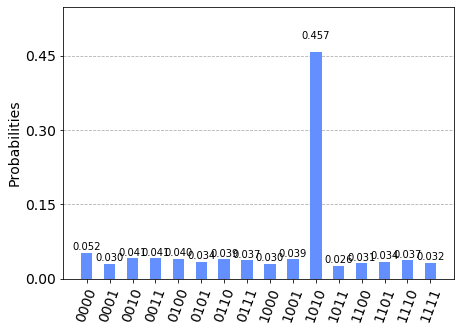

In [6]:
from qiskit.tools.visualization import plot_histogram
### Measurment ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

#backend = provider.get_backend('ibmq_qasm_simulator')
#print('\nExecuting job....\n')
#job = execute(qc, backend, shots=100)

#result = job.result()
#counts = result.get_counts(qc)
#plot_histogram(counts)

#print('RESULT: ',counts,'\n')
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1000)
result = job.result()

# Get counts and plot histogram
counts = result.get_counts(qc)
plot_histogram(counts)

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(qc, backend=qcomp)


In [10]:
from qiskit.tools.monitor import job_monitor

In [12]:
job_monitor(job)
result = job.result()

Job Status: job has successfully run


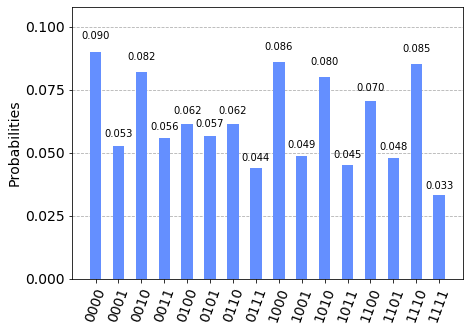

In [13]:
plot_histogram(result.get_counts(qc))